# Process

Here we will process the titanic data set.  We will look for 
* Missing Data
* Data outliers

### Part 1: Missing Data
First let's load the libraries and data

In [1]:
# Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Workshop Functions
import sys
sys.path.append('..')
from Wksp722_functions import * 

In [2]:
df = pd.read_csv("titanic_train.csv")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


As we did in a previous lecture, let's reset the index to ***PassengerId***

In [3]:
df.set_index('PassengerId', inplace=True)

Now let's start by looking for missing data

In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       685
Embarked      2
dtype: int64

With only 2 passengers in "Embarked" status showing missing, we will drop them from the dataframe

In [5]:
print(df.shape) # size of df before 
df = df.loc[df.loc[:,'Embarked'].notnull()]
print(df.shape) # size of df after

(885, 11)
(883, 11)


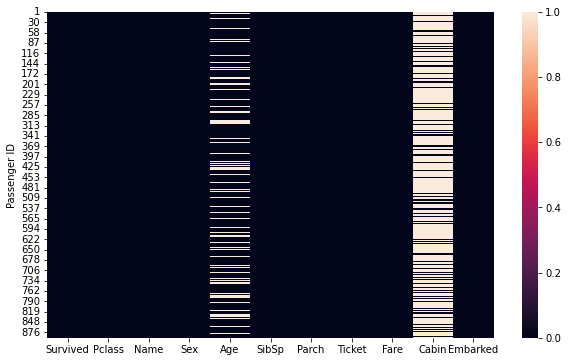

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna())
plt.ylabel('Passenger ID')
plt.show()

"Cabin" stands for the cabin number or the room number on the ship.  

We can hypothesize that location on the ship is not a strong correlation to whether they survived or not.  

Other factors such as the passenger's wealth, which may be related to their Cabin type, can be deduced from other variables such as 'Pclass', and 'Fare'.  

So we will remove this column from the dataframe

In [7]:
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
df.describe()

## If we wanted to replace all NAN's with the median value, use this code:
#temp = df.copy()
#temp['Age'] = temp['Age'].fillna(temp['Age'].median())
#temp.isnull().sum()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,883.000000,883.000000,706.000000,883.000000,883.000000,883.000000
mean,0.380521,2.315968,29.667380,0.527746,0.378256,32.024584
std,0.485790,0.832207,14.470766,1.106603,0.805074,49.780234
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.625000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.695800
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now let's theorize how to replace the missing ages.  A glance at the names shows that each name has a salutation such as "Mr.", "Mrs.", "Miss", "Master", etc.  It is a reasonable assumption that some salutations are correlated to age.  For instance, 
* "Miss" would generally be younger than a "Mrs.".  
* "Master" (salutation for a small child) would be younger than a "Mr."

So let's find the median age for each salutation and then replace missing age values with that for the passenger's respective category

Split the strings in the Name column into seperate names

Using the n=3 option restricts the splitting to 4 sub-strings.  Some people have very long names with double first names, and we are only interested in the 2nd column

Also using the "expand=True" option, we get the resulting strings back as separate columns, which makes accessing the data easier.  

In [9]:
split_name = df.loc[:,'Name'].str.split(n=3, expand=True)

In [10]:
# let's see the list of salutations
df.loc[:,'Salutation']=split_name[1]

In [11]:
#  Count the number of passengers for each salutation
df.groupby('Salutation').count().loc[:,'Name']

Salutation
Capt.          1
Col.           2
Countess.      1
Don.           1
Dr.            7
Jonkheer.      1
Lady.          1
Major.         2
Master.       40
Miss.        179
Mlle.          2
Mme.           1
Mr.          514
Mrs.         123
Ms.            1
Rev.           6
Sir.           1
Name: Name, dtype: int64

In [32]:
# Now let's calculate the median age for each salutation
# But first let's filter out the entries that have null values in the "Age" column
df_clean = df.loc[pd.notna(df.loc[:,'Age']),:]
df_clean.head()

### Uncomment the code below to verify all null records the "Age" column were removed
# df_clean['Age'].isnull().sum()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Salutation
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.


In [13]:
# Now let's calculate the median_age per salutation
median_age = df_clean.groupby('Salutation').median().loc[:,'Age']
print((median_age))

Salutation
Capt.        70.0
Col.         58.0
Countess.    33.0
Don.         40.0
Dr.          46.5
Jonkheer.    38.0
Lady.        48.0
Major.       48.5
Master.       3.5
Miss.        21.0
Mlle.        24.0
Mme.         24.0
Mr.          30.0
Mrs.         35.0
Ms.          28.0
Rev.         46.5
Sir.         49.0
Name: Age, dtype: float64


Now go back to the original dataframe and replace any missing values in the "Age" column with their respective median values

In [14]:
df.loc[:,'Age'].isnull().sum()

177

In [15]:
for ind in df.index:
    if np.isnan(df.loc[ind,'Age']): 
        df.loc[ind,'Age'] = median_age[df.loc[ind,'Salutation']]

***Curiosity Points (10 points)***
Use Method Chaining to replace the for loop above.  Verify that the resulting dataframe is the same as that with the for loop.
(Hint) use the ***index*** and ***map*** dataframe functions

If you're stuck and want to see one possible solution, run the code below.  Remove the '#' and then run

In [16]:
# M3L2_1()

### Part 2: Outliers

In [17]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Salutation
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.


Reviewing the current dataframe, we see that we do not need to consider the Survived, Pclass, Name, Sex, Ticket, and Embarked columns for outlier analysis.  This is because their the columns have unique values for each passenger (e.g. Name, Ticket) or there are too few categories to warrant an analysis (e.g. Survived, Pclass, Sex, Embarked).  We will examine these later.   

We also can not use the boxplot function for Salutation, as it requires a numeric number and it is not possible to assign a nominal order to the values in this column.  However, earlier in this exercise we saw the distribution of each.  

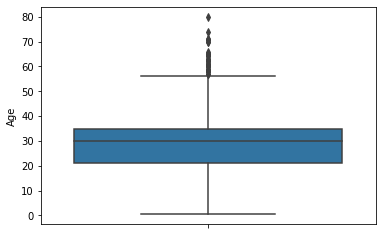

Number of Age outliers are:  38


In [18]:
# Review the Age column
sns.boxplot(y=df.loc[:,'Age'])
plt.show()

# We see several outliers over 55 at the top of the boxplot.  These are outliers but they are likely correctly recorded.  
# We will keep these records in the datafram and we can see who they are:
print('Number of Age outliers are: ', df.loc[df.loc[:,'Age']>55 , 'Name'].count())

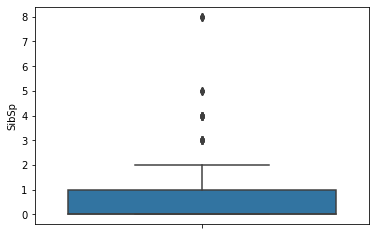

             SibSp  Survived
PassengerId                 
8                3         0
375              3         0
25               3         0
28               3         0
820              3         0
230              3         0
64               3         0
410              3         0
727              3         1
86               3         1
89               3         1
342              3         1
643              3         0
635              3         0
486              3         0
177              3         0
687              4         0
543              4         0
788              4         0
814              4         0
825              4         0
542              4         0
279              4         0
267              4         0
172              4         0
262              4         1
234              4         1
69               4         1
120              4         0
183              4         0
17               4         0
51               4         0
165           

In [19]:
#SibSp is the number of siblings and spouse that the passenger had on the titanic.  
sns.boxplot(y=df['SibSp'])
plt.show()

SibSpSurvivors = df.loc[df.loc[:,'SibSp']>2 , ['SibSp','Survived']]
Sorted_SibSpSurvivors = SibSpSurvivors.sort_values('SibSp')
print(Sorted_SibSpSurvivors)

We see that most passengers had either 1 or 0 siblings or spouses.  One big outlier here is a family of 8 none of whom survived.  

Next we can look at the Parch column that states the number of Parents or Children on board.  This will be very similar to the SibSp column

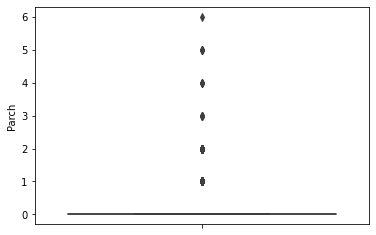

In [20]:
#SibSp is the number of siblings and spouse that the passenger had on the titanic.  
sns.boxplot(y=df.loc[:,'Parch'])
plt.show()

Here the boxplot outlines that most passengers has Parch values of 0.  

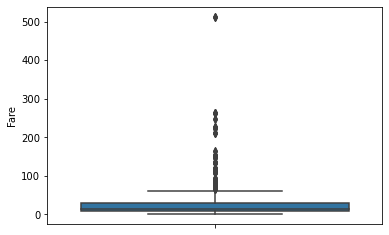

In [21]:
sns.boxplot(y=df.loc[:,'Fare'])
plt.show()

This boxplot is interesting.  It characterizes outlier fare as higher than $62.  However, many passengers paid much more, probably for higher class lodging.  Let's see the range of values grouped by class

The boxplots below show that most of the largest outliers in fare came from First Class, which is expected.  

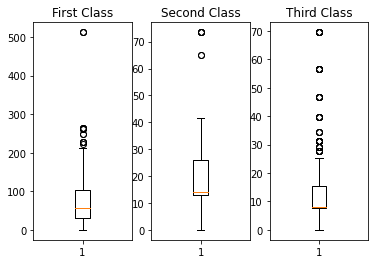

In [22]:
fig, axes = plt.subplots(nrows=1,ncols=3)
axes[0].boxplot(df.loc[df.loc[:,'Pclass']==1 , 'Fare'])
axes[1].boxplot(df.loc[df.loc[:,'Pclass']==2 , 'Fare'])
axes[2].boxplot(df.loc[df.loc[:,'Pclass']==3 , 'Fare'])
axes[0].set_title('First Class')
axes[1].set_title('Second Class')
axes[2].set_title('Third Class')
plt.show()

### Part 3: Exploratory Data Analysis
Let's dive a little deeper before heading to model building to see if certain factors were better for survival

We learned from the Titanic movie (though fiction) that women and children were allowed on life boats first.  Does the data confirm this?

In [23]:
totalPassengers = df.shape[0]

WomenSurvived = df.loc[(df.loc[:,'Survived']==1) & (df.loc[:,'Sex']=='female') , 'Name'].count()
MenSurvived = df.loc[(df.loc[:,'Survived']==1) & (df.loc[:,'Sex']=='male') , 'Name'].count() 

PcntWomenSurvived = 100 * WomenSurvived / totalPassengers
PcntMenSurvived = 100 * MenSurvived / totalPassengers

print(PcntWomenSurvived, PcntMenSurvived)

25.821064552661383 12.231030577576444


***Curiosity Points (5 Points)***
Using the ***groupby*** function, recreate the analysis above on percent of passengers survived based on their sex.  

If you're stuck and want to see one possible solution, run the code below.  Remove the '#' and then run

In [24]:
# M3L2_2()

***Curiosity Points (5 Points)***
Using the ***groupby*** function, what percentage of each class survived and was that a significant distinguisher for survival?

If you're stuck and want to see one possible solution, run the code below.  Remove the '#' and then run

In [25]:
# M3L2_3()

Let's look at histograms of age of those that survived to see if younger passengers were more likely to survive.  

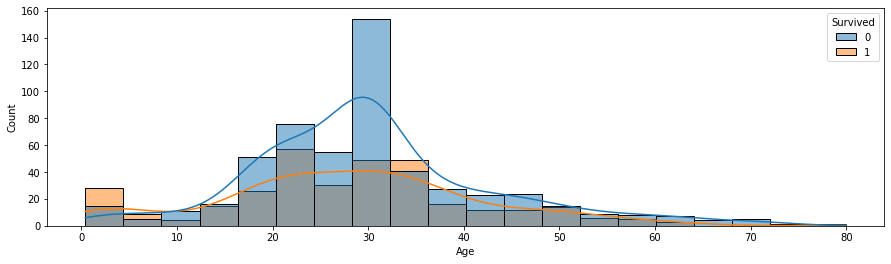

In [26]:
AgeSurvived = df.loc[df.loc[:,'Survived']==1 , 'Age']
AgeNotSurvived = df.loc[df.loc[:,'Survived']==0 , 'Age']

fig, axes = plt.subplots(figsize=(15,4))
sns.histplot(x=df.loc[:,'Age'],hue=df.loc[:,'Survived'], kde=True, bins=20)

plt.show()

In [27]:

survivedCounts, binEdges = np.histogram(AgeSurvived,bins=16)
notSurvivedCounts, binEdges2 = np.histogram(AgeNotSurvived,bins=16)
print(binEdges)

pcntCounts = survivedCounts/(survivedCounts+notSurvivedCounts)*100
print(pcntCounts)

[ 0.42     5.39375 10.3675  15.34125 20.315   25.28875 30.2625  35.23625
 40.21    45.18375 50.1575  55.13125 60.105   65.07875 70.0525  75.02625
 80.     ]
[68.08510638 35.         61.11111111 38.0952381  46.66666667 44.44444444
 26.19047619 36.98630137 33.33333333 41.02564103 30.3030303  37.5
 23.07692308  0.          0.         14.28571429]


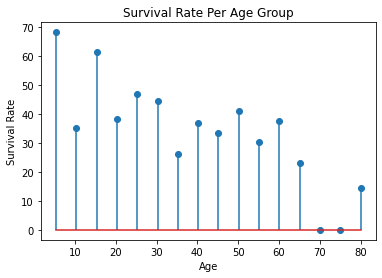

In [28]:
fig, ax = plt.subplots()
ax.stem(binEdges[1:], pcntCounts)
ax.set_title('Survival Rate Per Age Group')
ax.set_xlabel('Age')
ax.set_ylabel('Survival Rate')
plt.show()

We see from this chart that a higher percentage of younger passengers survived the titanic.  

***Curiosity Points (5 Points)*** Check out different notebooks on Kaggle.com to see how other data scientists have explored this data.  

Full list is here: https://www.kaggle.com/competitions/titanic/code?competitionId=3136&sortBy=voteCount

One good example is here: https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic

### Save cleaned dataset

In [29]:
df.to_csv('titanic_train_cleaned.csv')
median_age.to_csv('median_age.csv')

### Repeat for titanic_test.csv
Go back to the top of the dataset